<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/MNIST_CNN_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Image tagging with MNIST Dataset

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


# 1) Import 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Load Data

In [6]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(X_CV_train, y_CV_train), (X_test, y_test) = fashion_mnist_data.load_data()

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_CV_train, y_CV_train,test_size=(1000/6000),train_size=(5000/6000))



4422102/4422102 [==============================] - 1s 0us/step


In [7]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape) 
print("CV X shape: ", X_cv.shape) 
print("CV y shape: ", y_cv.shape) 
print("test X shape: ", X_test.shape)   
print("test y shape: ", y_test.shape)   

train X shape:  (50000, 28, 28)
train y shape:  (50000,)
CV X shape:  (10000, 28, 28)
CV y shape:  (10000,)
test X shape:  (10000, 28, 28)
test y shape:  (10000,)


In [8]:
# Define the labels

labels = [
    'T-shirt/top', # 0
    'Trouser',     # 1
    'Pullover',    # 2
    'Dress',       # 3
    'Coat',        # 4
    'Sandal',      # 5
    'Shirt',       # 6
    'Sneaker',     # 7
    'Bag',         # 8
    'Ankle boot'   # 9
]

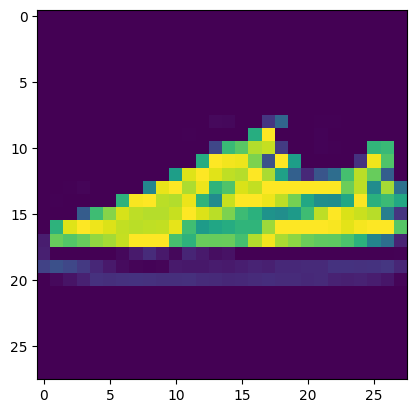

label: Sneaker


In [9]:
# Display one of the images

i = 1
img = X_train[i, : , :]
plt.imshow(img)
plt.show()
print(f"label: {labels[y_train[i]]}")

In [10]:
# display y label
y_train[i]

7

In [11]:
# Rescale the image values so that they lie in between 0 and 1.

X_train = X_train / 255.
X_test = X_test / 255.
X_cv = X_cv / 255.
X_train.shape

(50000, 28, 28)

In [ ]:
#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)
#X_cv = X_cv.reshape(X_cv.shape[0], -1)


In [12]:
X_train.shape

(50000, 28, 28)

In [13]:
y_train.shape

(50000,)

In [14]:
unique_values = np.unique(y_test)
counts = np.bincount(y_test)

# Iterate over the unique values and print their corresponding counts
for value in unique_values:
    count = counts[value]
    print(f"Count of {value}: {count}")


Count of 0: 1000
Count of 1: 1000
Count of 2: 1000
Count of 3: 1000
Count of 4: 1000
Count of 5: 1000
Count of 6: 1000
Count of 7: 1000
Count of 8: 1000
Count of 9: 1000


In [15]:
# Filter data for values Dress and Shirt
filter_indices = np.logical_or(y_train == 3, y_train == 6)
filtered_X_train = X_train[filter_indices]
filtered_y = y_train[filter_indices]
filtered_y_train = np.where(filtered_y == 3, 1, np.where(filtered_y == 6, 0, filtered_y))

print(filtered_y_train.shape)
print(filtered_X_train.shape)

(10072,)
(10072, 28, 28)


In [16]:
filter_indices = np.logical_or(y_test == 3, y_test == 6)
filtered_X_test = X_test[filter_indices]
filtered_y = y_test[filter_indices]
filtered_y_test = np.where(filtered_y == 3, 1, np.where(filtered_y == 6, 0, filtered_y))

print(filtered_y_test.shape)
print(filtered_X_test.shape)


(2000,)
(2000, 28, 28)


In [17]:
filter_indices = np.logical_or(y_cv == 3, y_cv == 6)
filtered_X_cv = X_cv[filter_indices]
filtered_y = y_cv[filter_indices]
filtered_y_cv = np.where(filtered_y == 3, 1, np.where(filtered_y == 6, 0, filtered_y))

print(filtered_y_cv.shape)
print(filtered_X_cv.shape)

(1928,)
(1928, 28, 28)


In [18]:
train_set_x = filtered_X_train
test_set_x = filtered_X_test
cv_set_x = filtered_X_cv

train_set_y = filtered_y_train
test_set_y = filtered_y_test
cv_set_y = filtered_y_cv

In [19]:
# Save the arrays
np.save('/content/gdrive/MyDrive/MNIST_CNN/train_set_x.npy', filtered_X_train)
np.save('/content/gdrive/MyDrive/MNIST_CNN/test_set_x.npy', filtered_X_test)
np.save('/content/gdrive/MyDrive/MNIST_CNN/cv_set_x.npy', filtered_X_cv)
np.save('/content/gdrive/MyDrive/MNIST_CNN/train_set_y.npy', filtered_y_train)
np.save('/content/gdrive/MyDrive/MNIST_CNN/test_set_y.npy', filtered_y_test)
np.save('/content/gdrive/MyDrive/MNIST_CNN/cv_set_y.npy', filtered_y_cv)